<a href="https://colab.research.google.com/github/suganya27302/Machine-learning/blob/main/Sms_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SMS SPAM CLASSIFICATION

### Importing the **libraries** and **dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

In [ ]:
sms=pd.read_csv('/content/drive/My Drive/Colab Notebooks/spam.csv',encoding='latin-1')

**Data** **Preprocessing**

In [ ]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
sms= sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [ ]:
sms.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
sms=sms.rename(columns={'v1':'label','v2':'message'})
sms.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
sms.shape

(5572, 2)

In [ ]:
sms.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [ ]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
sms.size

11144

In [ ]:
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
sms['length'] = sms['message'].apply(len)
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
sms['length'] = sms['message'].apply(len)
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb16eb1e10>,
      dtype=object)

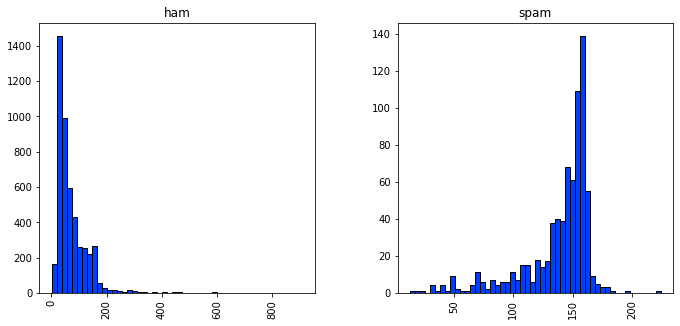

In [ ]:
plt.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-bright')
sms.hist(column='length', by='label', bins=50,figsize=(11,5))
# which message is lengthy

In [ ]:
text_feat = sms['message'].copy()

In [ ]:
print(text_feat)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object


In [ ]:
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
text_feat = text_feat.apply(text_process)

In [ ]:
vectorizer = TfidfVectorizer("english")

In [ ]:
features = vectorizer.fit_transform(text_feat)

In [ ]:
print(features)

  (0, 8871)	0.19696340342726038
  (0, 1168)	0.3454453072521403
  (0, 3821)	0.16228382867264401
  (0, 2198)	0.2918335915067389
  (0, 1862)	0.3297648855969494
  (0, 4809)	0.2918335915067389
  (0, 9107)	0.23822187576133733
  (0, 3861)	0.19227005405586492
  (0, 1864)	0.2918335915067389
  (0, 1401)	0.2626832171423389
  (0, 2482)	0.26752361109476797
  (0, 6381)	0.2701917502132373
  (0, 4652)	0.3454453072521403
  (0, 3764)	0.15705625796538664
  (1, 5978)	0.5462557824449175
  (1, 9003)	0.4313385731102942
  (1, 4620)	0.5233273701797004
  (1, 4848)	0.4080505634471753
  (1, 5946)	0.2741803362458879
  (2, 71)	0.23298968636017275
  (2, 1254)	0.16831155329741232
  (2, 6721)	0.23298968636017275
  (2, 8521)	0.1252035413992088
  (2, 6669)	0.23298968636017275
  (2, 6777)	0.1658630343061897
  :	:
  (5568, 3169)	0.6457639024659789
  (5568, 3543)	0.5628210076825846
  (5568, 3783)	0.3636095248537397
  (5568, 4156)	0.3660732290385455
  (5569, 7922)	0.520467167163554
  (5569, 7547)	0.520467167163554
  (5569, 

**Training the dataset**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,sms['label'],test_size=0.2,random_state=1)

Appling **svm ,knn,knn,logisticregression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
svc_accu=accuracy_score(y_test,y_pred)
print("accuracy:",svc_accu)


accuracy: 0.9829596412556054


In [ ]:
knc = KNeighborsClassifier(n_neighbors=49)
knc.fit(x_train,y_train)
y_predi=knc.predict(x_test)

In [ ]:
knc_accu=accuracy_score(y_test,y_predi)
print("accuracy:",knc_accu)

accuracy: 0.947085201793722


In [ ]:
mnb = MultinomialNB(alpha=0.2)
mnb.fit(x_train,y_train)
y_predic=mnb.predict(x_test)

In [ ]:
mnb_accu=accuracy_score(y_test,y_predic)
print("accuracy:",mnb_accu)

accuracy: 0.9811659192825112


In [ ]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
lrc.fit(x_train,y_train)
y_predict=lrc.predict(x_test)

In [ ]:
lrc_accu=accuracy_score(y_test,y_predict)
print("accuracy:",lrc_accu)

accuracy: 0.9614349775784753


**Confusion** **matrix**

Text(0.5, 12.5, 'Predicted label')

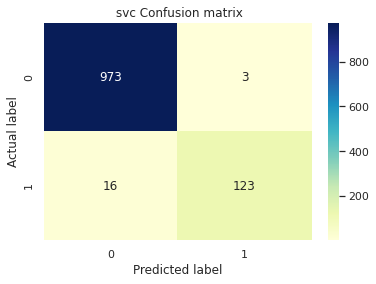

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title(' svc Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#svc confusion matrix

Text(0.5, 12.5, 'Predicted label')

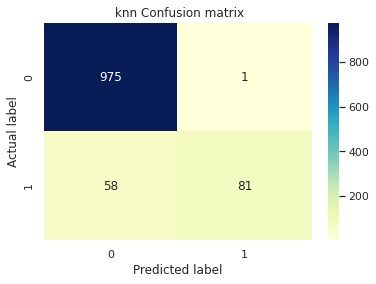

In [ ]:
cnfu_matrix = metrics.confusion_matrix(y_test, y_predi)
p = sns.heatmap(pd.DataFrame(cnfu_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title(' knn Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#knn confusion matrix

Text(0.5, 12.5, 'Predicted label')

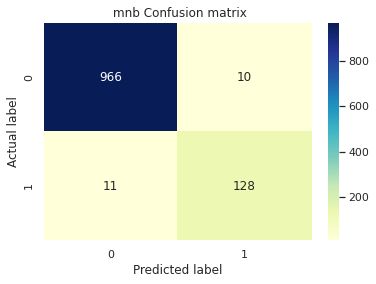

In [ ]:
cnfi_matrix = metrics.confusion_matrix(y_test, y_predic)
p = sns.heatmap(pd.DataFrame(cnfi_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title(' mnb Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#mnb confusion matrix

Text(0.5, 12.5, 'Predicted label')

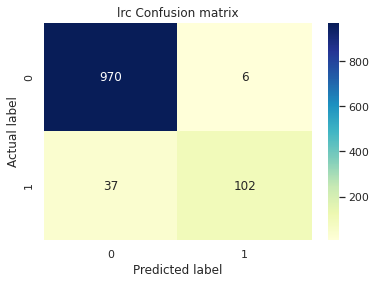

In [ ]:
cnfd_matrix = metrics.confusion_matrix(y_test, y_predict)
p = sns.heatmap(pd.DataFrame(cnfd_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('lrc Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#lrc confusion matrix

Comparison of **Accuracy**

In [ ]:
accuracies={'svc':svc_accu,'knc':knc_accu,'mnb':mnb_accu,'lrc':lrc_accu}

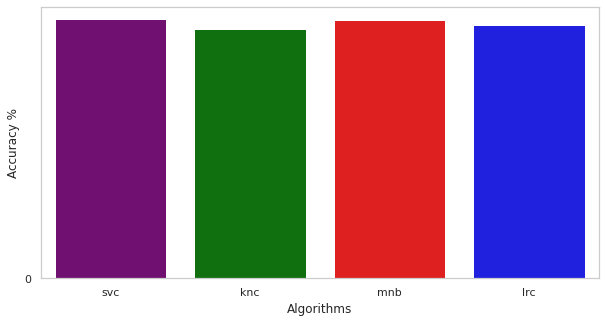

In [ ]:
colors = ["purple", "green","red","blue"]
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()